In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

n = 100  # number of teachers
data = pd.DataFrame({
    'teacher_id': range(1, n+1),
    'gender': np.random.choice(['Male', 'Female'], size=n),
    'tenure': np.random.choice(['Yes', 'No'], size=n, p=[0.4, 0.6]),
    'beauty': np.round(np.random.normal(5, 1.5, n), 2),   # normally distributed beauty scores
    'students': np.random.randint(10, 100, n),
    'rating': np.round(np.random.uniform(2, 5, n), 2)     # teaching ratings between 2–5
})

# Fix possible negative beauty values (if any)
data['beauty'] = data['beauty'].clip(lower=0, upper=10)

print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   teacher_id  gender tenure  beauty  students  rating
0           1    Male     No    4.71        85    3.73
1           2  Female     No    5.45        96    3.16
2           3    Male     No    4.95        24    3.93
3           4    Male     No    3.25        75    3.37
4           5    Male     No    6.71        41    3.64


Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?

In [2]:
print("\nQ1. Type of data:")
print("This is a cross-sectional dataset because it contains information about different teachers at a single point in time.")



Q1. Type of data:
This is a cross-sectional dataset because it contains information about different teachers at a single point in time.


Q2. Find the mean, median, minimum and maximum values for the students.

In [3]:
mean_students = data['students'].mean()
median_students = data['students'].median()
min_students = data['students'].min()
max_students = data['students'].max()

print("\nQ2. Students statistics:")
print(f"Mean: {mean_students:.2f}")
print(f"Median: {median_students}")
print(f"Minimum: {min_students}")
print(f"Maximum: {max_students}")


Q2. Students statistics:
Mean: 55.31
Median: 61.0
Minimum: 10
Maximum: 99


Q3. Produce the descriptive statistics table.

In [4]:
print("\nQ3. Descriptive Statistics:")
print(data.describe())


Q3. Descriptive Statistics:
       teacher_id      beauty    students     rating
count  100.000000  100.000000  100.000000  100.00000
mean    50.500000    5.165900   55.310000    3.52760
std     29.011492    1.451336   26.902253    0.93694
min      1.000000    2.590000   10.000000    2.03000
25%     25.750000    3.817500   30.250000    2.78500
50%     50.500000    5.365000   61.000000    3.50000
75%     75.250000    6.002500   75.250000    4.37000
max    100.000000   10.000000   99.000000    4.97000


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

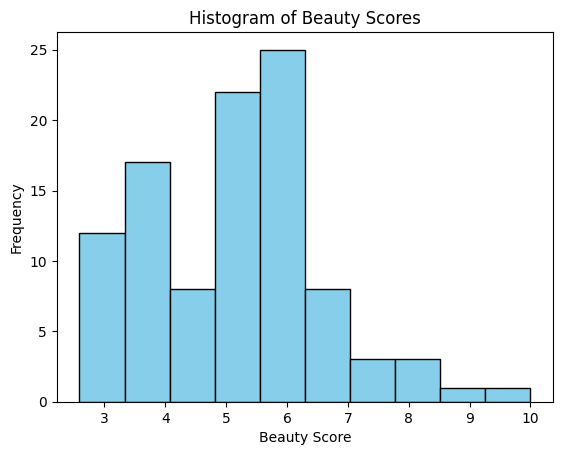

In [5]:
plt.hist(data['beauty'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Beauty Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Frequency")
plt.show()

Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [6]:
beauty_stats = data.groupby('gender')['beauty'].agg(['mean', 'std'])
print("\nQ5. Average Beauty Score by Gender:")
print(beauty_stats)


Q5. Average Beauty Score by Gender:
            mean       std
gender                    
Female  5.106964  1.637852
Male    5.240909  1.186635


Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [7]:
tenure_table = pd.crosstab(data['gender'], data['tenure'], normalize='index') * 100
print("\nQ6. Percentage of Tenure Status by Gender:")
print(tenure_table.round(2))

print("\nComment:")
print("If tenure percentages differ significantly between genders, we can say tenure status differs by gender.")


Q6. Percentage of Tenure Status by Gender:
tenure     No    Yes
gender              
Female  58.93  41.07
Male    50.00  50.00

Comment:
If tenure percentages differ significantly between genders, we can say tenure status differs by gender.
